In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
pd.set_option('display.width', 20)

In [3]:
trainvalues = pd.read_csv('train_values.csv', sep = ',', index_col = 'row_id')

In [4]:
#trainvalues[:4]

In [5]:
trainlabels = pd.read_csv('train_labels.csv', sep=',', index_col='row_id')

In [6]:
df = trainvalues

In [7]:
#trainlabels[:3]

In [8]:
df=df.join(trainlabels,how='left')

In [9]:
df_i = df[['econ__pct_civilian_labor',
           'econ__pct_unemployment','demo__pct_aged_65_years_and_older','demo__pct_hispanic','demo__pct_non_hispanic_african_american','demo__pct_non_hispanic_white','demo__pct_american_indian_or_alaskan_native','demo__pct_asian','demo__pct_adults_less_than_a_high_school_diploma','demo__pct_adults_bachelors_or_higher','health__pct_adult_obesity','health__pct_physical_inacticity','poverty_rate']]

### High Poverty Rate counties

In [10]:
df_i[df_i.poverty_rate >30].describe()

,econ__pct_civilian_labor,econ__pct_unemployment,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,demo__pct_american_indian_or_alaskan_native,demo__pct_asian,demo__pct_adults_less_than_a_high_school_diploma,demo__pct_adults_bachelors_or_higher,health__pct_adult_obesity,health__pct_physical_inacticity,poverty_rate
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.347350,0.097471,0.142529,0.112214,0.340886,0.426364,0.110000,0.006314,0.256533,0.130600,0.362271,0.325786,35.521429
std,0.054102,0.028857,0.029350,0.240516,0.300302,0.272421,0.248049,0.007286,0.069677,0.055347,0.051536,0.047886,4.357344
min,0.217000,0.045000,0.071000,0.000000,0.000000,0.060000,0.000000,0.000000,0.097707,0.049116,0.235000,0.197000,30.100000
25%,0.314000,0.076750,0.123000,0.013000,0.011500,0.241500,0.000000,0.000750,0.222942,0.097450,0.327500,0.296750,32.100000
50%,0.347500,0.095500,0.142500,0.024000,0.334000,0.340000,0.006000,0.005000,0.253372,0.117530,0.364000,0.332000,34.300000
75%,0.378250,0.114250,0.164000,0.055000,0.611750,0.563000,0.010250,0.009250,0.292291,0.159262,0.400500,0.363500,38.400000
max,0.486000,0.186000,0.228000,0.945000,0.855000,0.982000,0.852000,0.045000,0.466867,0.401180,0.484000,0.428000,47.400000


In [11]:
high = df_i[df_i.poverty_rate >32]

In [12]:
df[df.poverty_rate > 35].econ__economic_typology.value_counts()

Nonspecialized                        27
Federal/State government-dependent    17
Farm-dependent                         9
Mining-dependent                       4
Manufacturing-dependent                2
Name: econ__economic_typology, dtype: int64

In [13]:
high.shape

(107, 13)

In [14]:
high.describe().demo__pct_adults_less_than_a_high_school_diploma

count    107.000000
mean       0.257897
std        0.068257
min        0.098462
25%        0.224763
50%        0.255721
75%        0.291876
max        0.463366
Name: demo__pct_adults_less_than_a_high_school_diploma, dtype: float64

In [15]:
high.describe().demo__pct_adults_bachelors_or_higher

count    107.000000
mean       0.132665
std        0.060789
min        0.049116
25%        0.096661
50%        0.118930
75%        0.160101
max        0.401180
Name: demo__pct_adults_bachelors_or_higher, dtype: float64

### Low poverty rate counties

In [16]:
low = df[df.poverty_rate <= 7.5]

In [17]:
low = low.drop(labels = ['area__rucc','yr','area__urban_influence','econ__economic_typology'], axis = 1)

In [18]:
low.shape

(118, 30)

In [19]:
low.describe().demo__pct_adults_less_than_a_high_school_diploma

count    118.000000
mean       0.064098
std        0.022688
min        0.016129
25%        0.049371
50%        0.061870
75%        0.076425
max        0.125123
Name: demo__pct_adults_less_than_a_high_school_diploma, dtype: float64

In [20]:
low.describe().demo__pct_adults_bachelors_or_higher

count    118.000000
mean       0.368971
std        0.126963
min        0.157735
25%        0.276280
50%        0.356042
75%        0.444831
max        0.794872
Name: demo__pct_adults_bachelors_or_higher, dtype: float64

In [21]:
#low.corr()

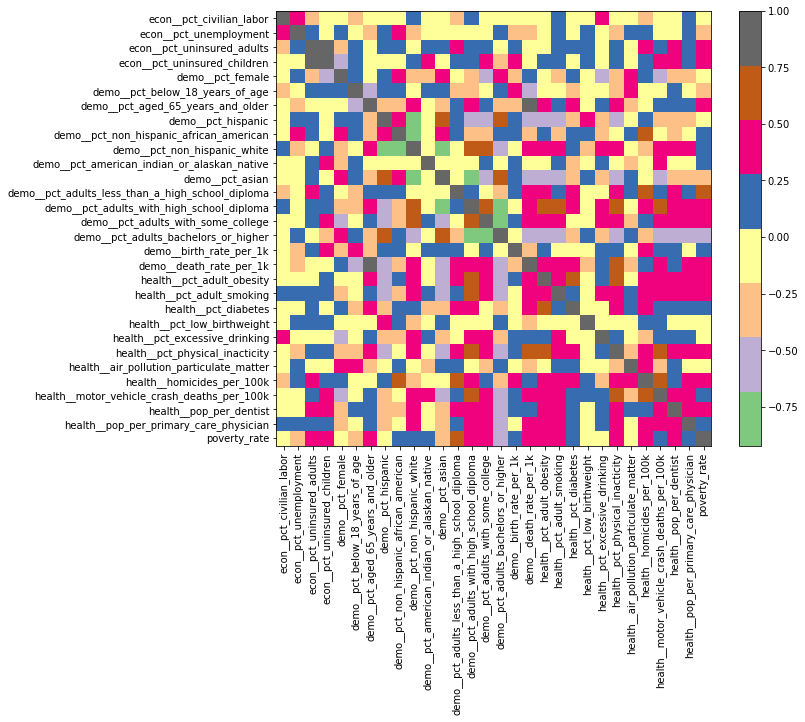

In [22]:
plt.figure(figsize=(10,8))
plt.imshow(low.corr(),cmap=plt.cm.Accent,interpolation='nearest')
plt.colorbar()
tick_marks=[i for i in range(len(low.columns))]
plt.xticks(tick_marks,low.columns, rotation = 90)
plt.yticks(tick_marks,low.columns)
plt.show()

In [23]:
low.shape

(118, 30)

In [24]:
df[df.poverty_rate == 12.000000].econ__economic_typology.unique()

array(['Farm-dependent', 'Nonspecialized', 'Manufacturing-dependent',
       'Recreation'], dtype=object)

In [25]:
df[df.poverty_rate <12.5].econ__economic_typology.value_counts()

Nonspecialized                        341
Farm-dependent                        200
Manufacturing-dependent               135
Recreation                            114
Mining-dependent                       66
Federal/State government-dependent     57
Name: econ__economic_typology, dtype: int64

In [26]:
df[df.poverty_rate == 12.000000].describe()

,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,...,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,poverty_rate
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.00000,22.000000,22.000000,22.000000,22.000000,...,22.000000,20.000000,17.000000,22.000000,22.000000,3.000000,17.000000,18.000000,19.000000,22.0
mean,0.505091,0.053409,0.220773,0.115500,0.495636,0.22600,0.190773,0.100818,0.034091,0.824727,...,0.097682,0.067700,0.189706,0.251909,11.181818,2.076667,19.442941,3045.166667,2717.315789,12.0
std,0.047298,0.018423,0.076273,0.056993,0.016777,0.04605,0.053769,0.121031,0.100312,0.153506,...,0.017667,0.015981,0.050273,0.055491,0.957992,0.156950,7.646923,1634.716858,3260.085327,0.0
min,0.377000,0.025000,0.094000,0.033000,0.458000,0.14300,0.087000,0.009000,0.000000,0.414000,...,0.065000,0.036000,0.097000,0.131000,9.000000,1.900000,8.460000,1149.000000,540.000000,12.0
25%,0.481250,0.041500,0.187500,0.079000,0.488750,0.20400,0.176750,0.026250,0.000000,0.762750,...,0.089750,0.060250,0.159000,0.212750,11.000000,2.015000,12.190000,1427.250000,1204.000000,12.0
50%,0.506500,0.055000,0.216000,0.110500,0.501000,0.22300,0.192500,0.057500,0.005500,0.891000,...,0.100000,0.070000,0.190000,0.267500,11.000000,2.130000,21.840000,2959.500000,2069.000000,12.0
75%,0.527750,0.057000,0.250000,0.150750,0.505750,0.24625,0.218500,0.120000,0.015500,0.925750,...,0.105000,0.076000,0.219000,0.290750,12.000000,2.165000,24.630000,4452.500000,2654.000000,12.0
max,0.617000,0.105000,0.416000,0.255000,0.519000,0.31500,0.309000,0.429000,0.471000,0.966000,...,0.147000,0.095000,0.277000,0.333000,13.000000,2.200000,31.740000,5800.000000,15200.000000,12.0


In [27]:
df_i.shape

(3198, 13)

In [28]:
trainvalues.shape

(3198, 33)

In [29]:
df.shape

(3198, 34)

In [30]:
(df.describe())['poverty_rate']

count    3198.000000
mean       16.817136
std         6.697969
min         2.500000
25%        12.000000
50%        15.800000
75%        20.300000
max        47.400000
Name: poverty_rate, dtype: float64

<IPython.core.display.Javascript object>


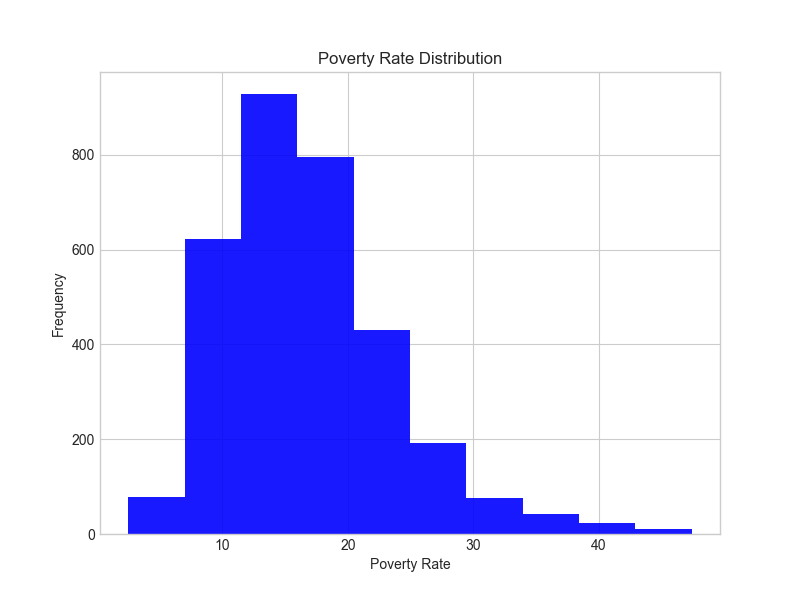

In [31]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,6))
plt.hist(df.poverty_rate,bins = 10, color = '#0000ff', alpha = 0.9)
plt.title('Poverty Rate Distribution')
plt.ylabel('Frequency')
plt.xlabel('Poverty Rate')
plt.show()

# Economic Typology vs Poverty Rate

In [32]:
typology = df.econ__economic_typology.unique()

<IPython.core.display.Javascript object>


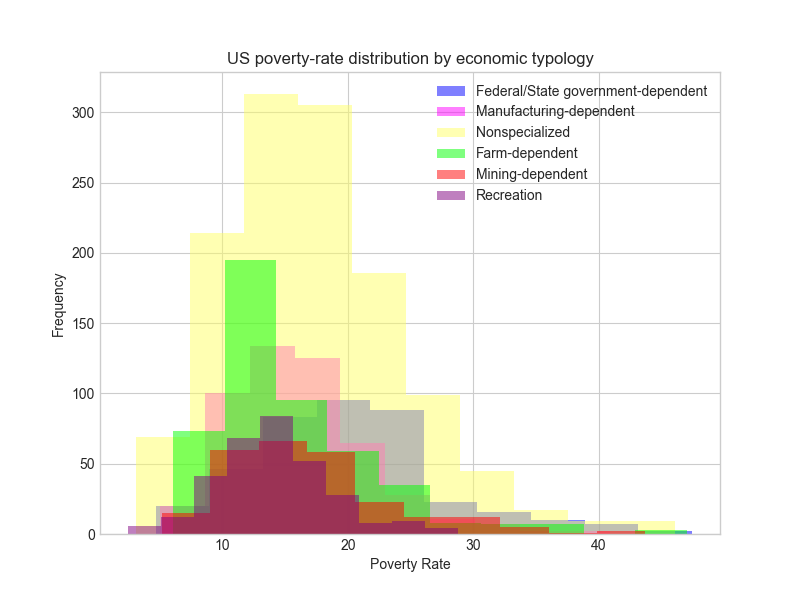

In [33]:
plt.figure(figsize=(8,6))
cols = ['#0000ff','#ff00ff','#ffff66','#00ff00','#ff0000','#800080']
for n in range(len(df['econ__economic_typology'].unique())):
    plt.hist(df[df.econ__economic_typology==typology[n]].poverty_rate, bins = 10, color = cols[n], alpha = 0.5)
    plt.ylabel('Frequency')
    plt.xlabel('Poverty Rate')
    plt.title('US poverty-rate distribution by economic typology')
    plt.legend(['Federal/State government-dependent','Manufacturing-dependent','Nonspecialized','Farm-dependent','Mining-dependent','Recreation'])
    

<IPython.core.display.Javascript object>


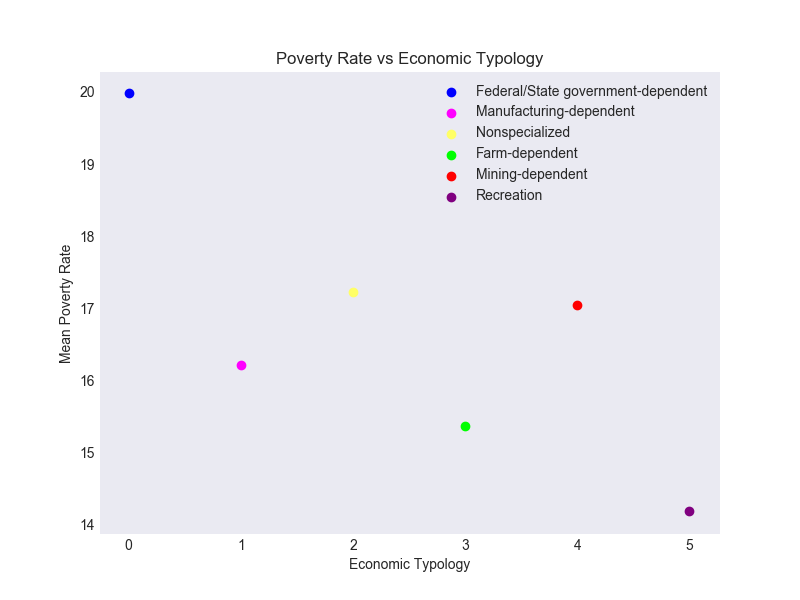

In [34]:
plt.figure(figsize=(8,6))
plt.style.use('seaborn-dark')
cols = ['#0000ff','#ff00ff','#ffff66','#00ff00','#ff0000','#800080']
for n in range(len(df['econ__economic_typology'].unique())):
    plt.scatter(n,np.mean(df[df.econ__economic_typology==typology[n]].poverty_rate), color = cols[n], alpha = 1)
    plt.xlabel('Economic Typology')
    plt.ylabel('Mean Poverty Rate')
    plt.title('Poverty Rate vs Economic Typology')
    plt.legend(['Federal/State government-dependent','Manufacturing-dependent','Nonspecialized','Farm-dependent','Mining-dependent','Recreation'])
    

#### The median poverty rate for Federal/State government-dependent counties is higher than for manufacturing-dependent counties.
#### The median poverty rate for mining-dependent counties is higher than for farm-dependent counties.

# Poverty Rate by Urban Influence

In [35]:
urbanareas = df.area__urban_influence.unique();len(urbanareas)

12

<IPython.core.display.Javascript object>


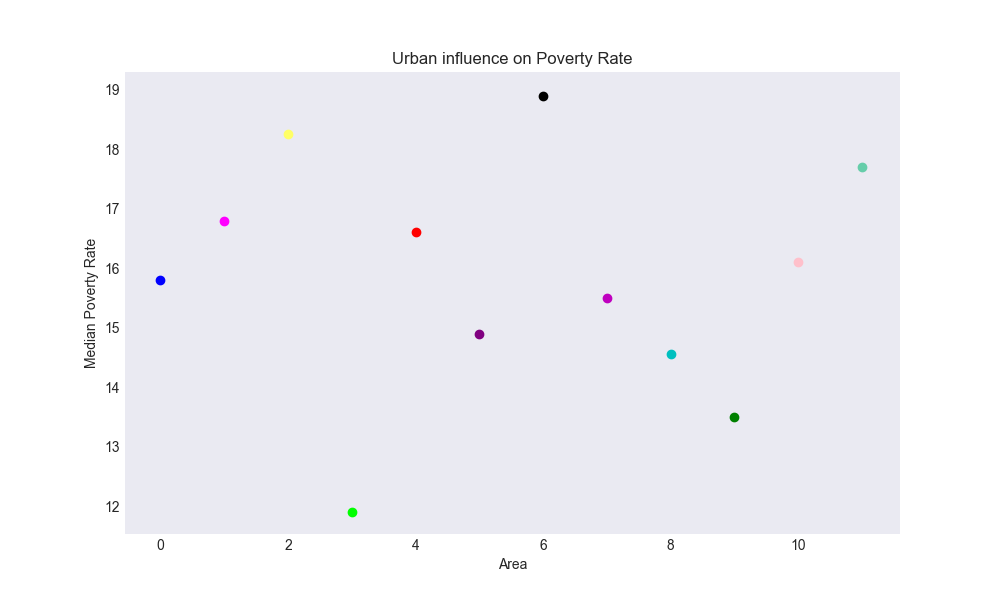

<IPython.core.display.Javascript object>


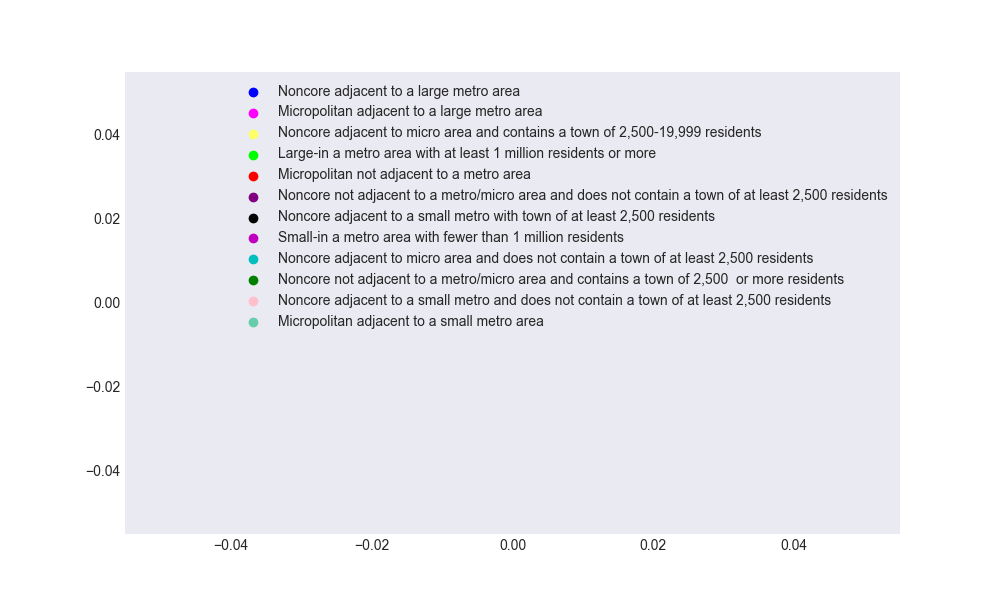

In [36]:
plt.figure(figsize=(10,6))
cols = ['#0000ff','#ff00ff','#ffff66','#00ff00','#ff0000','#800080','k','m','c','g','#ffc0cb','#66cdaa']
for n in range(len(df['area__urban_influence'].unique())):
    plt.scatter(n,np.median(df[df.area__urban_influence==urbanareas[n]].poverty_rate), color = cols[n], alpha = 1)
    plt.xlabel('Area')
    plt.ylabel('Median Poverty Rate')
    #plt.legend(urbanareas,loc=3)
    plt.title('Urban influence on Poverty Rate')

plt.figure(figsize=(10,6))
for n in range(len(df['area__urban_influence'].unique())):
    x = []
    y = []
    plt.scatter(x,y, color = cols[n])
    plt.legend(urbanareas)
    
plt.show()

#### Counties with which of the following urban influences have the lowest median poverty rate? => Large-in a metro area with at least 1 million residents or more

# Poverty Rate for Metro Counties

In [37]:
arearucc = df.area__rucc.unique()
df.area__rucc.unique()

array([ 'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area',
       'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area',
       'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area',
       'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area',
       'Metro - Counties in metro areas of 1 million population or more',
       'Metro - Counties in metro areas of 250,000 to 1 million population',
       'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area',
       'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area',
       'Metro - Counties in metro areas of fewer than 250,000 population'], dtype=object)

<IPython.core.display.Javascript object>


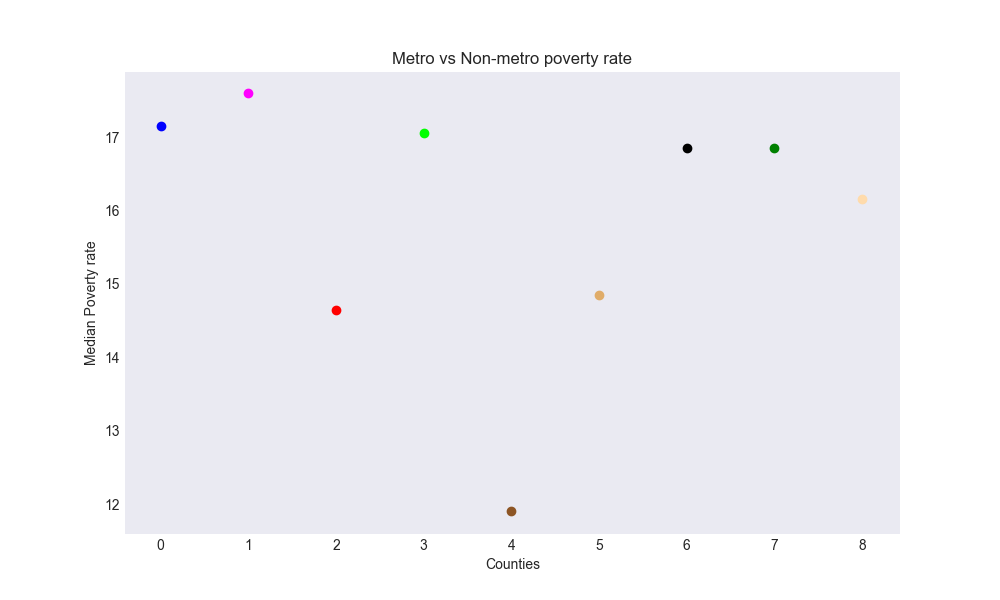

<IPython.core.display.Javascript object>


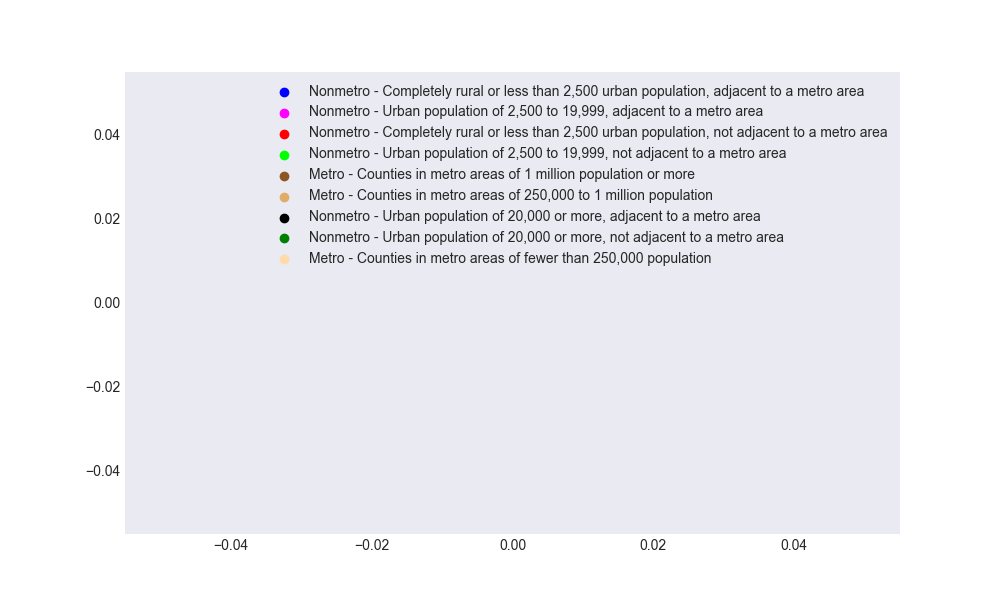

In [38]:
plt.figure(figsize=(10,6))
cols = ['#0000ff','#ff00ff','r','#00ff00','#8d5524','#e0ac69','k','g','#ffdbac']
for n in range(len(arearucc)):
    plt.scatter(n, np.median(df[df.area__rucc==arearucc[n]].poverty_rate), color = cols[n])
    plt.ylabel('Median Poverty rate')
    plt.xlabel('Counties')
    plt.title('Metro vs Non-metro poverty rate')
    
plt.figure(figsize=(10,6))
for n in range(len(arearucc)):
    plt.scatter(x, y, color = cols[n])
    plt.legend(['Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area',
       'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area',
       'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area',
       'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area',
       'Metro - Counties in metro areas of 1 million population or more',
       'Metro - Counties in metro areas of 250,000 to 1 million population',
       'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area',
       'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area',
       'Metro - Counties in metro areas of fewer than 250,000 population'])
plt.show()

#### The median poverty rate for non-metro counties is higher than for metro counties

<IPython.core.display.Javascript object>


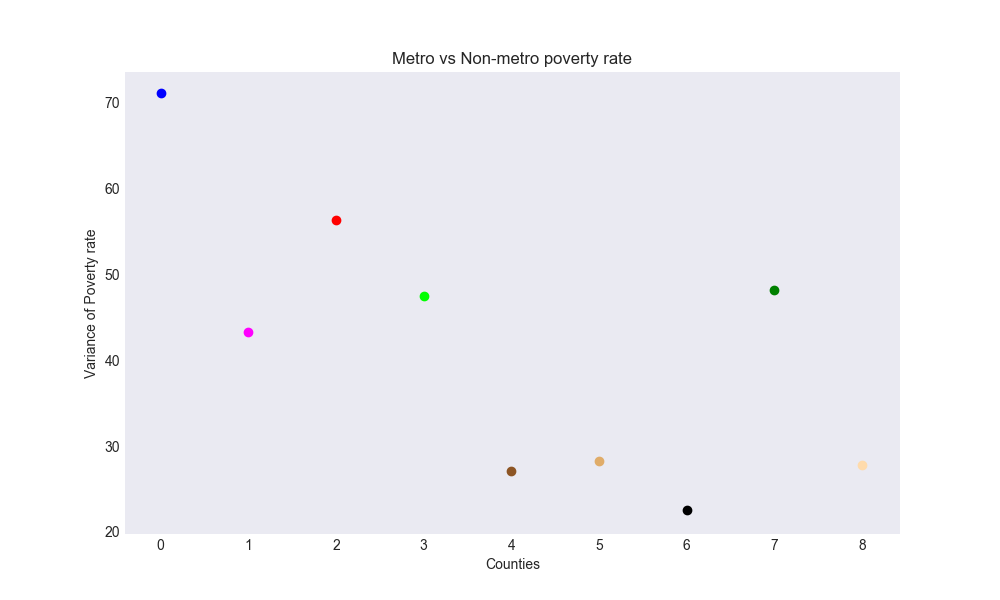

<IPython.core.display.Javascript object>


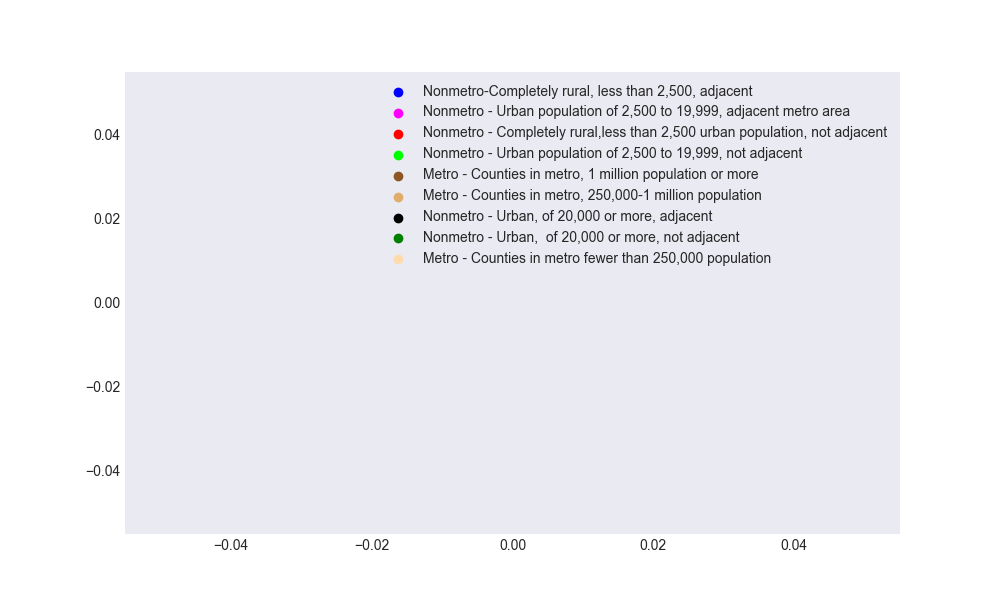

In [39]:
plt.figure(figsize=(10,6))
cols = ['#0000ff','#ff00ff','r','#00ff00','#8d5524','#e0ac69','k','g','#ffdbac']
for n in range(len(arearucc)):
    plt.scatter(n, np.var(df[df.area__rucc==arearucc[n]].poverty_rate), color = cols[n])
    plt.ylabel('Variance of Poverty rate')
    plt.xlabel('Counties')
    plt.title('Metro vs Non-metro poverty rate')

plt.figure(figsize=(10,6))
for n in range(len(arearucc)):
    plt.scatter(x,y, color = cols[n])
    plt.legend(['Nonmetro-Completely rural, less than 2,500, adjacent',
       'Nonmetro - Urban population of 2,500 to 19,999, adjacent metro area',
       'Nonmetro - Completely rural,less than 2,500 urban population, not adjacent',
       'Nonmetro - Urban population of 2,500 to 19,999, not adjacent',
       'Metro - Counties in metro, 1 million population or more',
       'Metro - Counties in metro, 250,000-1 million population',
       'Nonmetro - Urban, of 20,000 or more, adjacent',
       'Nonmetro - Urban,  of 20,000 or more, not adjacent',
       'Metro - Counties in metro fewer than 250,000 population'])
plt.show()

#### There is more variance in the poverty rate for non-metro counties than for metro counties

# Health Indicators vs Poverty Rate

In [40]:
health_indicators = df.loc[:,['health__pct_adult_smoking',
                              'health__pct_excessive_drinking',
                             'health__pct_adult_obesity',
                             'health__pct_diabetes',
                              df.columns[-1]
                            ]]

In [41]:
health_indicators.rename(columns={'health__pct_adult_smoking':'adult_smoking',
                                 'health__pct_excessive_drinking':'excessive_drinking',
                                 'health__pct_adult_obesity':'adult_obesity',
                                 'health__pct_diabetes':'diabetes'}, inplace =True)

In [42]:
health_indicators[:10]

,adult_smoking,excessive_drinking,adult_obesity,diabetes,poverty_rate
row_id,,,,,
0,0.219,NaN,0.345,0.159,22.6
2,0.222,0.177,0.296,0.123,17.3
4,NaN,NaN,0.267,0.092,24.4
5,0.293,0.174,0.272,0.084,16.4
8,0.165,0.178,0.232,0.080,17.4
9,0.268,NaN,0.302,0.112,12.2
10,0.099,NaN,0.320,0.151,12.6
11,0.262,0.167,0.367,0.132,25.0
12,0.174,0.133,0.304,0.075,10.1


In [43]:
health_indicators.corr()

,adult_smoking,excessive_drinking,adult_obesity,diabetes,poverty_rate
adult_smoking,1.000000,-0.083865,0.408590,0.435922,0.395457
excessive_drinking,-0.083865,1.000000,-0.241194,-0.378496,-0.353254
adult_obesity,0.408590,-0.241194,1.000000,0.701658,0.444293
diabetes,0.435922,-0.378496,0.701658,1.000000,0.537038
poverty_rate,0.395457,-0.353254,0.444293,0.537038,1.000000


<IPython.core.display.Javascript object>


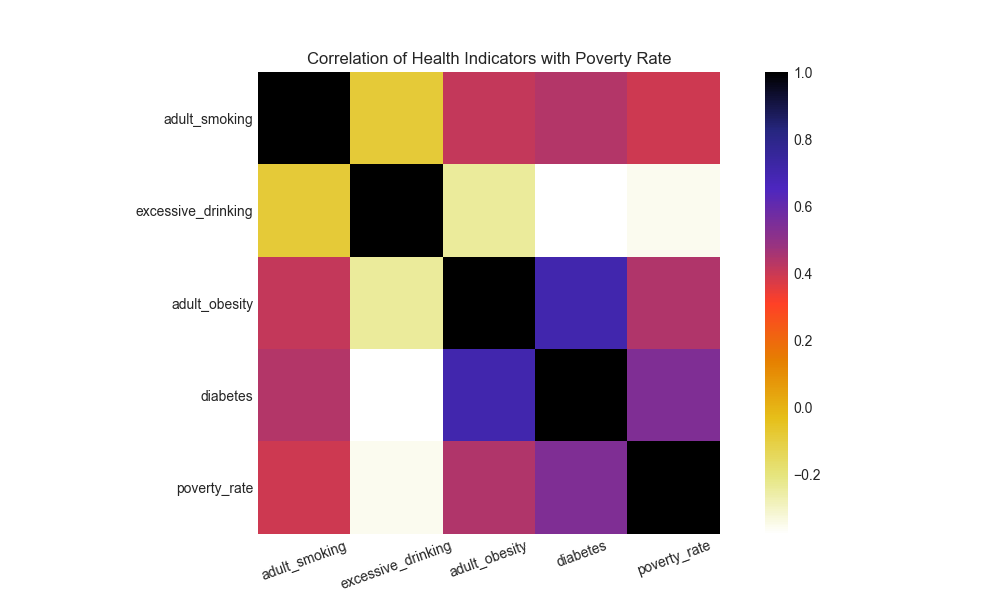

In [44]:
plt.figure(figsize=(10,6))
plt.imshow(health_indicators.corr(), cmap = plt.cm.CMRmap_r, interpolation = 'nearest')
plt.colorbar()
tick_marks = [i for i in range(len(health_indicators.columns))]
plt.xticks(tick_marks, health_indicators.columns, rotation = 20)
plt.yticks(tick_marks,health_indicators.columns, rotation = 0)
plt.title('Correlation of Health Indicators with Poverty Rate')
plt.subplots_adjust(left = 0.0)
plt.show()

# Age and Urban Category vs Poverty Rate

In [45]:
import re
list(df.area__rucc.unique())

['Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area',
 'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area',
 'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area',
 'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area',
 'Metro - Counties in metro areas of 1 million population or more',
 'Metro - Counties in metro areas of 250,000 to 1 million population',
 'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area',
 'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area',
 'Metro - Counties in metro areas of fewer than 250,000 population']

In [46]:
metro = df[
            (df.area__rucc=='Metro - Counties in metro areas of fewer than 250,000 population')|
            (df.area__rucc=='Metro - Counties in metro areas of 250,000 to 1 million population')|
            (df.area__rucc=='Metro - Counties in metro areas of 1 million population or more')
          ]

In [47]:
non_metro = df[
                    (df.area__rucc!='Metro - Counties in metro areas of fewer than 250,000 population')&
                    (df.area__rucc!='Metro - Counties in metro areas of 250,000 to 1 million population')&
                    (df.area__rucc!='Metro - Counties in metro areas of 1 million population or more')
              ]

In [48]:
#metro[:3]

In [49]:
df=trainvalues.join(trainlabels,how='left')

In [50]:
df1 = df.copy()

In [51]:
df1.area__rucc.unique()

array([ 'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area',
       'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area',
       'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area',
       'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area',
       'Metro - Counties in metro areas of 1 million population or more',
       'Metro - Counties in metro areas of 250,000 to 1 million population',
       'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area',
       'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area',
       'Metro - Counties in metro areas of fewer than 250,000 population'], dtype=object)

In [52]:
df1.area__rucc=df1['area__rucc'].map({'Metro - Counties in metro areas of fewer than 250,000 population':'metro',
                      'Metro - Counties in metro areas of 250,000 to 1 million population':'metro',
                      'Metro - Counties in metro areas of 1 million population or more':'metro',
                       'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area':'nonmetro',
                       'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area':'nonmetro',
                    'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area':'nonmetro',
                    'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area':'nonmetro',
                       'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area':'nonmetro',
                       'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area':'nonmetro'
                      })

In [53]:
median = df1.demo__pct_aged_65_years_and_older.describe().loc['50%']

In [54]:
df1.demo__pct_aged_65_years_and_older.describe()

count    3196.000000
mean        0.170137
std         0.043594
min         0.043000
25%         0.142000
50%         0.167000
75%         0.194000
max         0.355000
Name: demo__pct_aged_65_years_and_older, dtype: float64

In [55]:
metro_elderly = metro[metro.demo__pct_aged_65_years_and_older>median]

In [56]:
metro_non_elderly = metro[metro.demo__pct_aged_65_years_and_older<=median]

In [57]:
non_metro_elderly = non_metro[non_metro.demo__pct_aged_65_years_and_older>median]

In [58]:
non_metro_non_elderly = non_metro[non_metro.demo__pct_aged_65_years_and_older<=median]

<IPython.core.display.Javascript object>


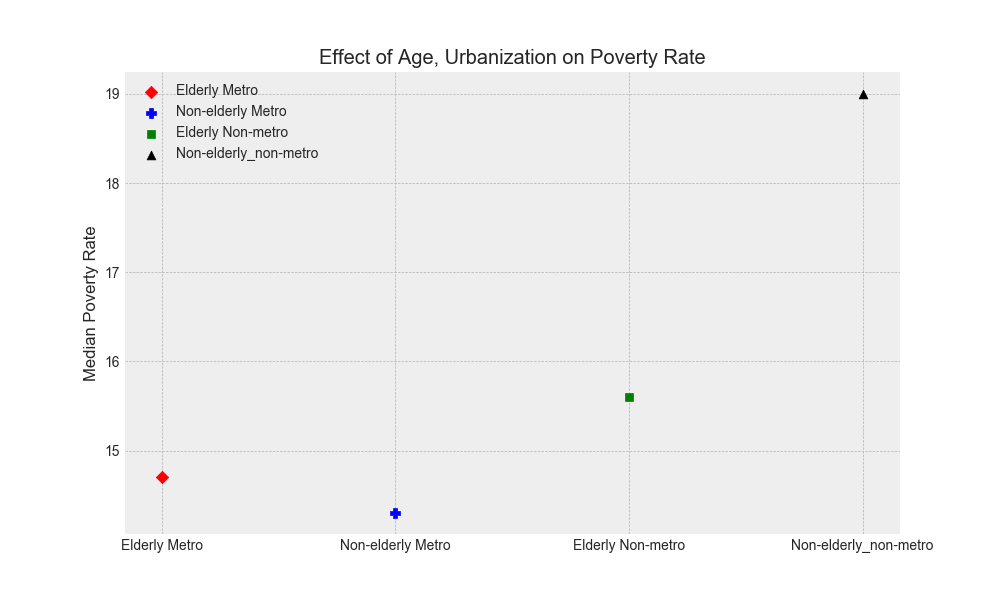

In [59]:
plt.style.use('bmh')
plt.figure(figsize=(10,6))
plt.scatter(1,np.median(metro_elderly.poverty_rate), s=40, marker = 'D', color = 'r', label = 'Elderly Metro')
plt.scatter(2, np.median(metro_non_elderly.poverty_rate), s=60, marker = 'P', color = 'b', label = 'Non-elderly Metro')
plt.scatter(3, np.median(non_metro_elderly.poverty_rate), s=40, marker = 's', color = 'g', label = 'Elderly Non-metro')
plt.scatter(4, np.median(non_metro_non_elderly.poverty_rate),s=40, marker = '^', color = 'k', label = 'Non-elderly_non-metro')
plt.ylabel('Median Poverty Rate')
Class =['Elderly Metro','Non-elderly Metro','Elderly Non-metro','Non-elderly_non-metro']
tick_marks = [i for i in range(1,len(Class)+1)]
plt.xticks(tick_marks,Class)
plt.title('Effect of Age, Urbanization on Poverty Rate')
plt.legend()

In [60]:
#plt.figure(1).clear()

### area__urban_influence

In [61]:
print(df.area__urban_influence.unique());len(df.area__urban_influence.unique())

['Noncore adjacent to a large metro area'
 'Micropolitan adjacent to a large metro area'
 'Noncore adjacent to micro area and contains a town of 2,500-19,999 residents'
 'Large-in a metro area with at least 1 million residents or more'
 'Micropolitan not adjacent to a metro area'
 'Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents'
 'Noncore adjacent to a small metro with town of at least 2,500 residents'
 'Small-in a metro area with fewer than 1 million residents'
 'Noncore adjacent to micro area and does not contain a town of at least 2,500 residents'
 'Noncore not adjacent to a metro/micro area and contains a town of 2,500  or more residents'
 'Noncore adjacent to a small metro and does not contain a town of at least 2,500 residents'
 'Micropolitan adjacent to a small metro area']


12

In [62]:
df[:3]

,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,...,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,poverty_rate
row_id,,,,,,,,,,,,,,,,,,,,,
0,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to a large metro area,Federal/State government-dependent,0.358,0.089,0.253,0.099,0.494,0.200,0.195,...,0.154,NaN,0.317,12.0,9.33,33.75,5429.0,6949.0,b,22.6
2,"Nonmetro - Urban population of 2,500 to 19,999...",Micropolitan adjacent to a large metro area,Manufacturing-dependent,0.503,0.057,0.171,0.065,0.503,0.243,0.166,...,0.080,0.177,0.350,14.0,2.10,23.81,3060.0,1749.0,b,17.3
4,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.471,0.070,0.297,0.122,0.497,0.250,0.178,...,0.079,NaN,0.259,10.0,NaN,NaN,690.0,NaN,b,24.4


<IPython.core.display.Javascript object>


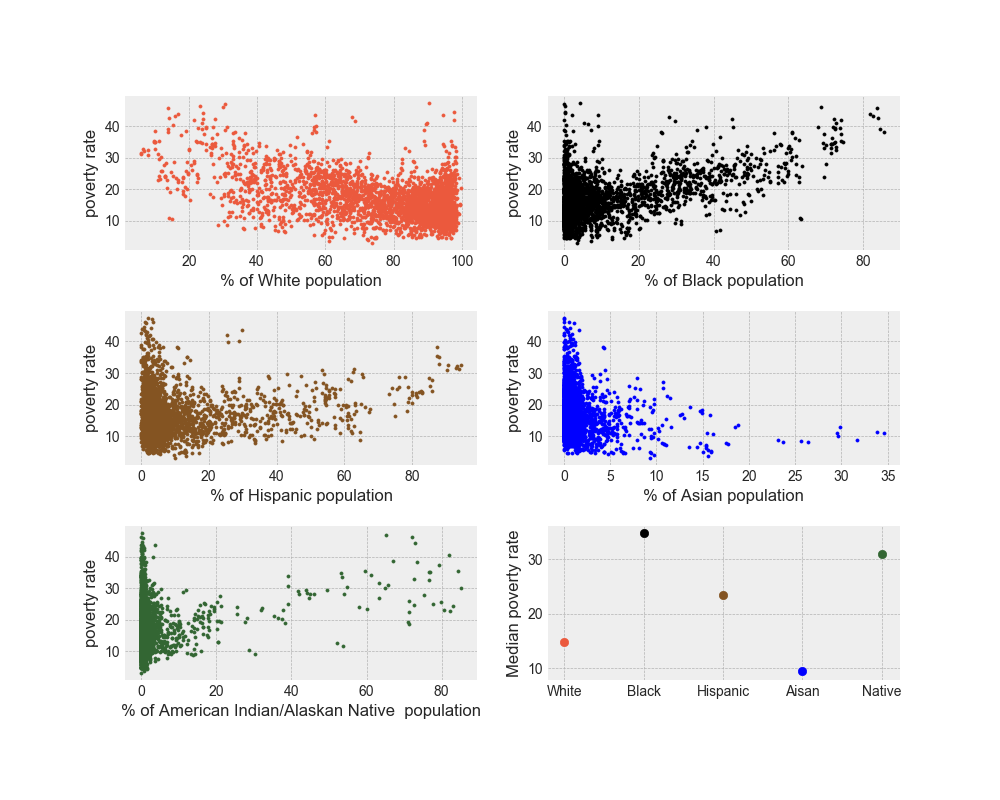

In [63]:
plt.rcParams['figure.figsize'] = (10,8)
fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6)) = plt.subplots(3,2, sharex = False, sharey = False)

ax1.scatter((df.demo__pct_non_hispanic_white)*100,df.poverty_rate, color = '#eb593d', s =5)
ax1.set_xlabel('% of White population')
ax1.set_ylabel('poverty rate')

ax2.scatter((df.demo__pct_non_hispanic_african_american)*100, df.poverty_rate, color = 'k', s = 5)
ax2.set_xlabel('% of Black population')
ax2.set_ylabel('poverty rate')

ax3.scatter((df.demo__pct_hispanic)*100, df.poverty_rate, color = '#845422', s = 5)
ax3.set_xlabel('% of Hispanic population')
ax3.set_ylabel('poverty rate')

ax4.scatter((df.demo__pct_asian)*100, df.poverty_rate, color = 'b', s = 5)
ax4.set_xlabel('% of Asian population')
ax4.set_ylabel('poverty rate')

ax5.scatter((df.demo__pct_american_indian_or_alaskan_native)*100, df.poverty_rate, color = '#336633', s = 5)
ax5.set_xlabel('% of American Indian/Alaskan Native  population')
ax5.set_ylabel('poverty rate')

ax6.scatter(1,np.median(df[df.demo__pct_non_hispanic_white>.6].poverty_rate), color = '#eb593d', label = 'White')
ax6.scatter(2,np.median(df[df.demo__pct_non_hispanic_african_american>.6].poverty_rate) , color = 'k', label = 'Black')
ax6.scatter(3,np.median(df[df.demo__pct_hispanic>.6].poverty_rate), color = '#845422', label = 'Hispanic')
ax6.scatter(4,np.median(df[df.demo__pct_asian>.2].poverty_rate), color = 'b', label = 'Asian')
ax6.scatter(5,np.median(df[df.demo__pct_american_indian_or_alaskan_native>.6].poverty_rate), color = '#336633', label = 'Amerindian/Alaskan')
ax6.set_ylabel('Median poverty rate')

tick_marks = [i for i in range(1,6)]
plt.xticks(tick_marks,['White', 'Black', 'Hispanic', 'Aisan', 'Native'])
plt.subplots_adjust(hspace = 0.4, bottom = 0.15)

<IPython.core.display.Javascript object>


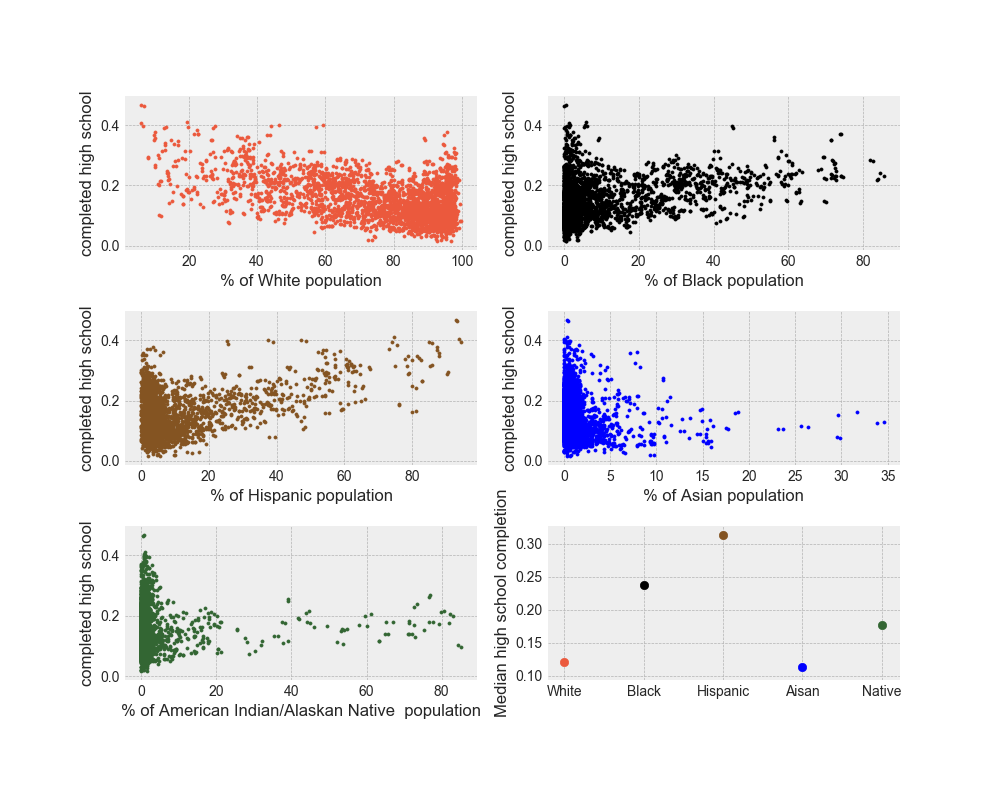

In [64]:
plt.rcParams['figure.figsize'] = (10,8)
fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6)) = plt.subplots(3,2, sharex = False, sharey = False)

ax1.scatter((df.demo__pct_non_hispanic_white)*100,df.demo__pct_adults_less_than_a_high_school_diploma, color = '#eb593d', s =5)
ax1.set_xlabel('% of White population')
ax1.set_ylabel('completed high school')

ax2.scatter((df.demo__pct_non_hispanic_african_american)*100, df.demo__pct_adults_less_than_a_high_school_diploma, color = 'k', s = 5)
ax2.set_xlabel('% of Black population')
ax2.set_ylabel('completed high school')

ax3.scatter((df.demo__pct_hispanic)*100, df.demo__pct_adults_less_than_a_high_school_diploma, color = '#845422', s = 5)
ax3.set_xlabel('% of Hispanic population')
ax3.set_ylabel('completed high school')

ax4.scatter((df.demo__pct_asian)*100, df.demo__pct_adults_less_than_a_high_school_diploma, color = 'b', s = 5)
ax4.set_xlabel('% of Asian population')
ax4.set_ylabel('completed high school')

ax5.scatter((df.demo__pct_american_indian_or_alaskan_native)*100, df.demo__pct_adults_less_than_a_high_school_diploma, color = '#336633', s = 5)
ax5.set_xlabel('% of American Indian/Alaskan Native  population')
ax5.set_ylabel('completed high school')

ax6.scatter(1,np.median(df[df.demo__pct_non_hispanic_white>.6].demo__pct_adults_less_than_a_high_school_diploma), color = '#eb593d', label = 'White')
ax6.scatter(2,np.median(df[df.demo__pct_non_hispanic_african_american>.6].demo__pct_adults_less_than_a_high_school_diploma) , color = 'k', label = 'Black')
ax6.scatter(3,np.median(df[df.demo__pct_hispanic>.6].demo__pct_adults_less_than_a_high_school_diploma), color = '#845422', label = 'Hispanic')
ax6.scatter(4,np.median(df[df.demo__pct_asian>.2].demo__pct_adults_less_than_a_high_school_diploma), color = 'b', label = 'Asian')
ax6.scatter(5,np.median(df[df.demo__pct_american_indian_or_alaskan_native>.6].demo__pct_adults_less_than_a_high_school_diploma), color = '#336633', label = 'Amerindian/Alaskan')
ax6.set_ylabel('Median high school completion')

tick_marks = [i for i in range(1,6)]
plt.xticks(tick_marks,['White', 'Black', 'Hispanic', 'Aisan', 'Native'])
plt.subplots_adjust(hspace = 0.4, bottom = 0.15)

In [65]:
np.median(df[df.demo__pct_non_hispanic_african_american>.75].poverty_rate)

43.0

<IPython.core.display.Javascript object>


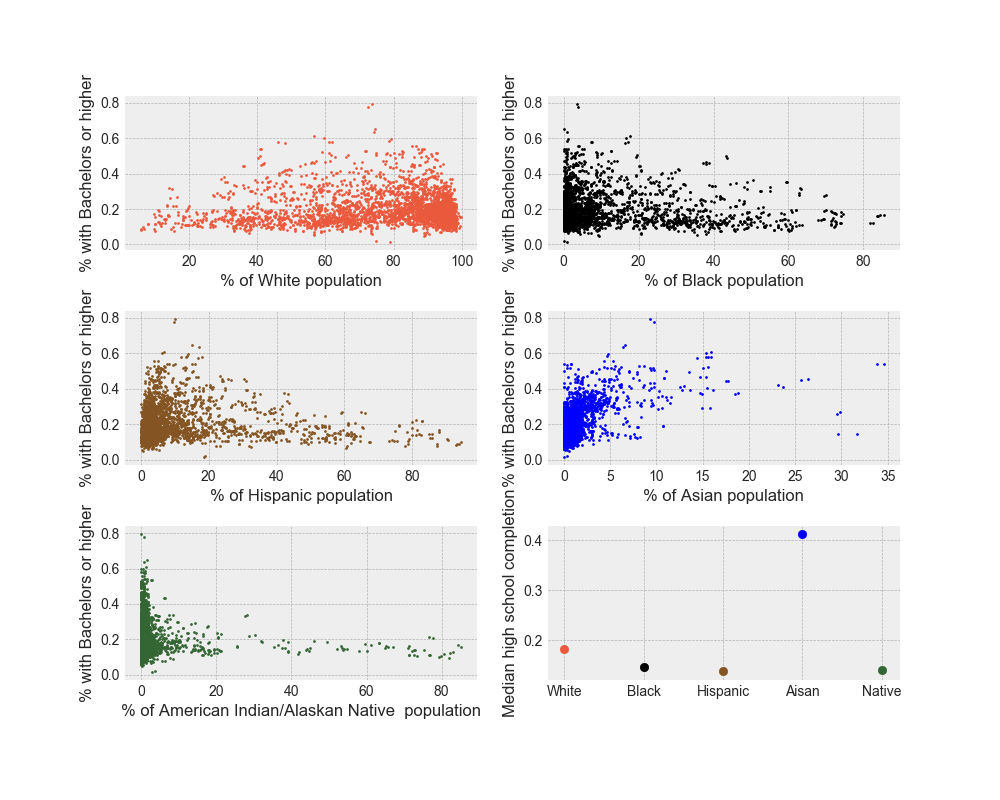

In [66]:
plt.rcParams['figure.figsize'] = (10,8)
fig, ((ax1,ax2),(ax3,ax4), (ax5,ax6)) = plt.subplots(3,2, sharex = False, sharey = False)

ax1.scatter((df.demo__pct_non_hispanic_white)*100,df.demo__pct_adults_bachelors_or_higher, color = '#eb593d', s =2)
ax1.set_xlabel('% of White population')
ax1.set_ylabel('% with Bachelors or higher')

ax2.scatter((df.demo__pct_non_hispanic_african_american)*100, df.demo__pct_adults_bachelors_or_higher, color = 'k', s = 2)
ax2.set_xlabel('% of Black population')
ax2.set_ylabel('% with Bachelors or higher')

ax3.scatter((df.demo__pct_hispanic)*100, df.demo__pct_adults_bachelors_or_higher, color = '#845422', s = 2)
ax3.set_xlabel('% of Hispanic population')
ax3.set_ylabel('% with Bachelors or higher')

ax4.scatter((df.demo__pct_asian)*100, df.demo__pct_adults_bachelors_or_higher, color = 'b', s = 2)
ax4.set_xlabel('% of Asian population')
ax4.set_ylabel('% with Bachelors or higher')

ax5.scatter((df.demo__pct_american_indian_or_alaskan_native)*100, df.demo__pct_adults_bachelors_or_higher, color = '#336633', s = 2)
ax5.set_xlabel('% of American Indian/Alaskan Native  population')
ax5.set_ylabel('% with Bachelors or higher')

ax6.scatter(1,np.median(df[df.demo__pct_non_hispanic_white>.6].demo__pct_adults_bachelors_or_higher), color = '#eb593d', label = 'White')
ax6.scatter(2,np.median(df[df.demo__pct_non_hispanic_african_american>.6].demo__pct_adults_bachelors_or_higher) , color = 'k', label = 'Black')
ax6.scatter(3,np.median(df[df.demo__pct_hispanic>.6].demo__pct_adults_bachelors_or_higher), color = '#845422', label = 'Hispanic')
ax6.scatter(4,np.median(df[df.demo__pct_asian>.2].demo__pct_adults_bachelors_or_higher), color = 'b', label = 'Asian')
ax6.scatter(5,np.median(df[df.demo__pct_american_indian_or_alaskan_native>.6].demo__pct_adults_bachelors_or_higher), color = '#336633', label = 'Amerindian/Alaskan')
ax6.set_ylabel('Median high school completion')

tick_marks = [i for i in range(1,6)]
plt.xticks(tick_marks,['White', 'Black', 'Hispanic', 'Aisan', 'Native'])
plt.subplots_adjust(hspace = 0.4, bottom = 0.15)

In [67]:
df[:3]

,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,...,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,poverty_rate
row_id,,,,,,,,,,,,,,,,,,,,,
0,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to a large metro area,Federal/State government-dependent,0.358,0.089,0.253,0.099,0.494,0.200,0.195,...,0.154,NaN,0.317,12.0,9.33,33.75,5429.0,6949.0,b,22.6
2,"Nonmetro - Urban population of 2,500 to 19,999...",Micropolitan adjacent to a large metro area,Manufacturing-dependent,0.503,0.057,0.171,0.065,0.503,0.243,0.166,...,0.080,0.177,0.350,14.0,2.10,23.81,3060.0,1749.0,b,17.3
4,"Nonmetro - Completely rural or less than 2,500...",Noncore adjacent to micro area and contains a ...,Federal/State government-dependent,0.471,0.070,0.297,0.122,0.497,0.250,0.178,...,0.079,NaN,0.259,10.0,NaN,NaN,690.0,NaN,b,24.4


In [68]:
df = pd.get_dummies(df, columns = ['area__urban_influence','econ__economic_typology','yr'])

### area__rucc  
#### This is a categorical data and should be represented as such

In [69]:
print(df.area__rucc.unique())
len(df.area__rucc.unique())

[ 'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area'
 'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area'
 'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area'
 'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area'
 'Metro - Counties in metro areas of 1 million population or more'
 'Metro - Counties in metro areas of 250,000 to 1 million population'
 'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area'
 'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area'
 'Metro - Counties in metro areas of fewer than 250,000 population']


9

In [70]:
area__rucc_order = [
                    'Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area',
                   'Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area',
                   'Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area',
                   'Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area',
                   'Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area',
                   'Nonmetro - Urban population of 20,000 or more, adjacent to a metro area',
                   'Metro - Counties in metro areas of fewer than 250,000 population',
                   'Metro - Counties in metro areas of 250,000 to 1 million population',
                   'Metro - Counties in metro areas of 1 million population or more'
                    ]

In [71]:
df.area__rucc = df.area__rucc.astype('category', ordered = True, categories = area__rucc_order).cat.codes

In [72]:
df[:3]

,area__rucc,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,...,"area__urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",area__urban_influence_Small-in a metro area with fewer than 1 million residents,econ__economic_typology_Farm-dependent,econ__economic_typology_Federal/State government-dependent,econ__economic_typology_Manufacturing-dependent,econ__economic_typology_Mining-dependent,econ__economic_typology_Nonspecialized,econ__economic_typology_Recreation,yr_a,yr_b
row_id,,,,,,,,,,,,,,,,,,,,,
0,1,0.358,0.089,0.253,0.099,0.494,0.200,0.195,0.044,0.517,...,0,0,0,1,0,0,0,0,0,1
2,3,0.503,0.057,0.171,0.065,0.503,0.243,0.166,0.017,0.016,...,0,0,0,0,1,0,0,0,0,1
4,0,0.471,0.070,0.297,0.122,0.497,0.250,0.178,0.554,0.002,...,0,0,0,1,0,0,0,0,0,1


In [73]:
df.area__rucc = df.area__rucc.apply(lambda x:x+1)

In [74]:
df[:3]

,area__rucc,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,...,"area__urban_influence_Noncore not adjacent to a metro/micro area and does not contain a town of at least 2,500 residents",area__urban_influence_Small-in a metro area with fewer than 1 million residents,econ__economic_typology_Farm-dependent,econ__economic_typology_Federal/State government-dependent,econ__economic_typology_Manufacturing-dependent,econ__economic_typology_Mining-dependent,econ__economic_typology_Nonspecialized,econ__economic_typology_Recreation,yr_a,yr_b
row_id,,,,,,,,,,,,,,,,,,,,,
0,2,0.358,0.089,0.253,0.099,0.494,0.200,0.195,0.044,0.517,...,0,0,0,1,0,0,0,0,0,1
2,4,0.503,0.057,0.171,0.065,0.503,0.243,0.166,0.017,0.016,...,0,0,0,0,1,0,0,0,0,1
4,1,0.471,0.070,0.297,0.122,0.497,0.250,0.178,0.554,0.002,...,0,0,0,1,0,0,0,0,0,1


In [75]:
df.area__rucc.unique()

array([2, 4, 1, 3, 9, 8, 6, 5, 7], dtype=int64)

In [76]:
def scale(df,i):
    from sklearn import preprocessing
    try:
        if i.lower() == 'standard':
            T = preprocessing.StandardScaler().fit_transform(df)
        elif i.lower() == 'minmax':
            T = preprocessing.MinMaxScaler().fit_transform(df)
        elif i.lower() == 'maxabs':
            T = preprocessing.MaxAbsScaler().fit_transform(df)
        elif i.lower() == 'normalizer':
            T = preprocessing.Normalizer().fit_transform(df)
        return pd.DataFrame(T)
    except:
        print('wrong input parameter')

In [77]:
pd.isnull(df).any(axis = 1).value_counts()

True     2129
False    1069
dtype: int64

In [78]:
df.fillna(-999999, inplace = True)

In [79]:
pd.isnull(df).any(axis = 1).value_counts()

False    3198
dtype: int64

In [80]:
X = np.array(df.drop('poverty_rate',1))

In [81]:
y = np.array(df['poverty_rate'] )

In [82]:
y.shape

(3198,)

In [83]:
X.shape

(3198, 50)

In [84]:
#X = scale(X,'maxabs')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.28, random_state = 4)

In [85]:
print(X_test.shape, y_test.shape)

(896, 50) (896,)


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
clf = LinearRegression(n_jobs=-1)
clf = clf.fit(X, y)
#print('linreg score:' , clf.score(X_test,y_test))

#clf1 = svm.SVR(kernel='linear')
#clf1 = clf1.fit(X_train, y_train)
#print('SVR score:' , clf1.score(X_test,y_test))

# Preparing test 

In [87]:
df2 = pd.read_csv('test_values.csv', delimiter=',', index_col=0)

X_TEST = pd.get_dummies(df2, columns = ['area__urban_influence','econ__economic_typology','yr'])

X_TEST.area__rucc = X_TEST.area__rucc.astype('category', ordered = True, categories = area__rucc_order).cat.codes

X_TEST.area__rucc = X_TEST.area__rucc.apply(lambda x:x+1)

In [88]:
X_TEST.area__rucc.unique()

array([7, 6, 3, 2, 8, 4, 1, 9, 5], dtype=int64)

In [89]:
pd.isnull(X_TEST).any(axis = 1).value_counts()

True     1999
False    1081
dtype: int64

In [90]:
X_TEST.fillna(-999999, inplace = True)

In [91]:
pd.isnull(df).any(axis = 1).value_counts()

False    3198
dtype: int64

In [92]:
X_TEST = scale(X_TEST,'maxabs')

In [93]:
clf.predict(X_test).shape

(896,)

In [94]:
Pred_1_linreg = clf.predict(X_TEST);Pred_1_linreg

array([ 19.48245677,  18.85814512,  10.3556556 , ...,  22.01271362,
        22.3204361 ,  19.59927549])

In [95]:
submission = pd.read_csv('submission_format.csv', index_col=0)

submission['poverty_rate'] = Pred_1_linreg

submission.to_csv('submission_format.csv')

In [96]:
# evaluate model. MSE (Mean Squared Error). RMSE (Root Mean Squared Error)
from sklearn import metrics
y_pred = clf.predict(X_test);#print(y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred));RMSE

3.058733126282795

In [97]:
y_train = y_train.reshape(2302,1)

In [98]:
#pd.DataFrame(y_train).to_pickle('y_train_pickle.txt')

In [99]:
X_test.shape

(896, 50)

In [119]:
import numpy as np
import pandas as pd

In [120]:
#from sklearn.tree import DecisionTreeRegressor as reg
from sklearn.ensemble import RandomForestRegressor as reg

In [121]:
reg1 = reg(max_depth=10)
reg2 = reg(max_depth=5)
reg3 = reg(max_depth=2)

In [125]:
reg1.fit(X_train,y_train.ravel())
reg2.fit(X_train,y_train.ravel())
reg3.fit(X_train,y_train.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [126]:
pred1 = reg1.predict(X_test)
pred2 = reg2.predict(X_test)
pred3 = reg3.predict(X_test)

In [129]:
from sklearn import metrics
y_pred = clf.predict(X_test);#print(y_pred)
MSE = metrics.mean_squared_error(y_test,pred3)
RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred));RMSE

3.058733126282795